    INFO : 2020-05-10 19:59:07,719 : start: calc_avg_score
    INFO : 2020-05-10 19:59:07,720 : start: set_train_test_dataset
    INFO : 2020-05-10 19:59:08,289 : start: create_model
    INFO : 2020-05-10 19:59:08,947 : score[  0]: 0.031673
    INFO : 2020-05-10 19:59:08,948 : start: set_train_test_dataset
    INFO : 2020-05-10 19:59:09,490 : start: create_model
    INFO : 2020-05-10 19:59:10,156 : score[  1]: 0.034138
    INFO : 2020-05-10 19:59:10,157 : start: set_train_test_dataset
    INFO : 2020-05-10 19:59:10,695 : start: create_model
    INFO : 2020-05-10 19:59:11,361 : score[  2]: 0.031642
    INFO : 2020-05-10 19:59:11,362 : start: set_train_test_dataset
    INFO : 2020-05-10 19:59:11,957 : start: create_model
    INFO : 2020-05-10 19:59:12,608 : score[  3]: 0.035737
    INFO : 2020-05-10 19:59:12,609 : start: set_train_test_dataset
    INFO : 2020-05-10 19:59:13,149 : start: create_model
    INFO : 2020-05-10 19:59:13,784 : score[  4]: 0.035760
    INFO : 2020-05-10 19:59:13,

    INFO : 2020-05-10 20:00:03,562 : start: set_train_test_dataset
    INFO : 2020-05-10 20:00:04,115 : start: create_model
    INFO : 2020-05-10 20:00:04,811 : score[ 45]: 0.034153
    INFO : 2020-05-10 20:00:04,811 : start: set_train_test_dataset
    INFO : 2020-05-10 20:00:05,393 : start: create_model
    INFO : 2020-05-10 20:00:06,051 : score[ 46]: 0.034078
    INFO : 2020-05-10 20:00:06,051 : start: set_train_test_dataset
    INFO : 2020-05-10 20:00:06,649 : start: create_model
    INFO : 2020-05-10 20:00:07,356 : score[ 47]: 0.035482
    INFO : 2020-05-10 20:00:07,357 : start: set_train_test_dataset
    INFO : 2020-05-10 20:00:07,894 : start: create_model
    INFO : 2020-05-10 20:00:08,547 : score[ 48]: 0.033560
    INFO : 2020-05-10 20:00:08,547 : start: set_train_test_dataset
    INFO : 2020-05-10 20:00:09,133 : start: create_model
    INFO : 2020-05-10 20:00:09,827 : score[ 49]: 0.029868
    INFO : 2020-05-10 20:00:09,827 : start: set_train_test_dataset
    INFO : 2020-05-10 2

    INFO : 2020-05-10 20:00:58,578 : start: create_model
    INFO : 2020-05-10 20:00:59,224 : score[ 90]: 0.035383
    INFO : 2020-05-10 20:00:59,225 : start: set_train_test_dataset
    INFO : 2020-05-10 20:00:59,744 : start: create_model
    INFO : 2020-05-10 20:01:00,384 : score[ 91]: 0.034484
    INFO : 2020-05-10 20:01:00,385 : start: set_train_test_dataset
    INFO : 2020-05-10 20:01:00,905 : start: create_model
    INFO : 2020-05-10 20:01:01,568 : score[ 92]: 0.033077
    INFO : 2020-05-10 20:01:01,569 : start: set_train_test_dataset
    INFO : 2020-05-10 20:01:02,086 : start: create_model
    INFO : 2020-05-10 20:01:02,738 : score[ 93]: 0.032392
    INFO : 2020-05-10 20:01:02,745 : start: set_train_test_dataset
    INFO : 2020-05-10 20:01:03,435 : start: create_model
    INFO : 2020-05-10 20:01:04,086 : score[ 94]: 0.033190
    INFO : 2020-05-10 20:01:04,087 : start: set_train_test_dataset
    INFO : 2020-05-10 20:01:04,660 : start: create_model
    INFO : 2020-05-10 20:01:05,30

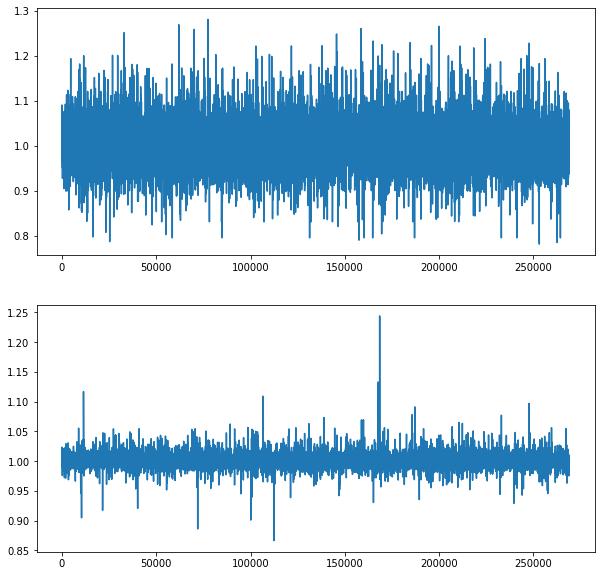

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    file_name = "train_v9"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    bitcoin.calc_avg_score(csv)
    (
        data_train,
        data_test,
        label_train,
        label_test,
    ) = bitcoin.set_train_test_dataset(csv, 0.2)
    model = bitcoin.create_model(data_train, label_train)

    x = data_test#[-3500:]
    y_result = list(label_test)#[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

if __name__ == "__main__":
    main()